In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("D:\\ML-DataSets\\placement.csv")

In [3]:
df.sample(5)

,cgpa,placement_exam_marks,placed
635,6.69,10.0,0
80,6.87,46.0,1
347,7.24,34.0,1
294,6.12,17.0,0
215,7.72,22.0,0


<Axes: xlabel='placement_exam_marks', ylabel='Density'>

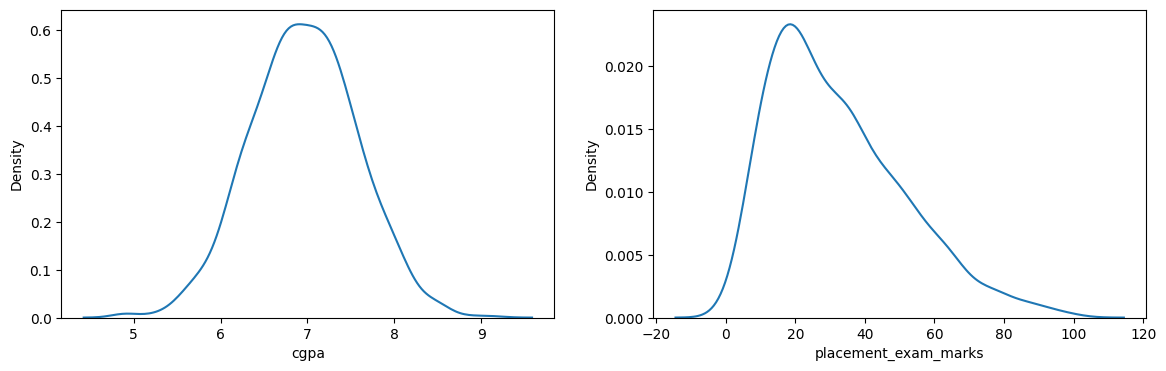

In [6]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.kdeplot(df['cgpa'])

plt.subplot(122)
sns.kdeplot(df['placement_exam_marks'])

<Axes: ylabel='cgpa'>

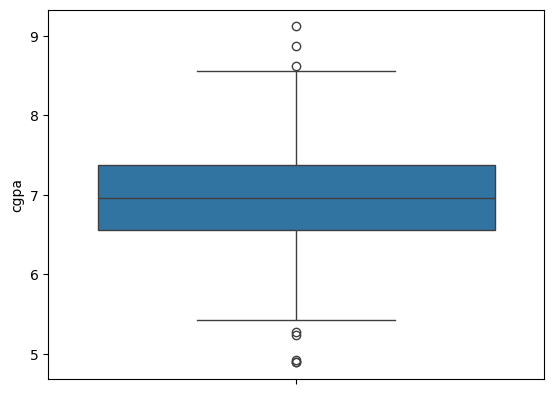

In [7]:
sns.boxplot(df['cgpa'])

<Axes: ylabel='placement_exam_marks'>

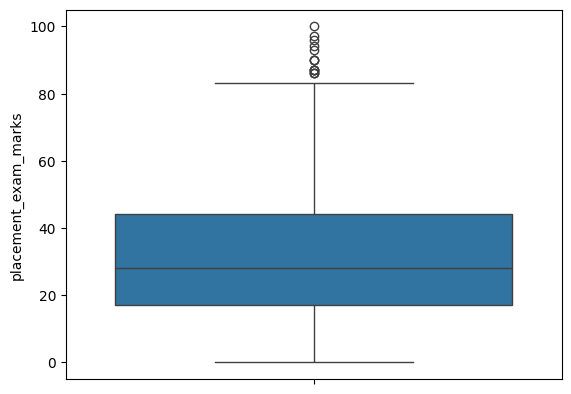

In [8]:
sns.boxplot(df['placement_exam_marks'])

In [9]:
print('mean value of cgpa :', df['cgpa'].mean())
print('mean value of cgpa :', df['cgpa'].std())
print('mean value of cgpa :', df['cgpa'].min())
print('mean value of cgpa :', df['cgpa'].max())

mean value of cgpa : 6.96124
mean value of cgpa : 0.6158978751323894
mean value of cgpa : 4.89
mean value of cgpa : 9.12


In [11]:
# finding the boundary values

print('Highest allowed', df['cgpa'].mean() + 3*df['cgpa'].std())
print('Lowest allowed', df['cgpa'].mean() - 3*df['cgpa'].std())

Highest allowed 8.808933625397168
Lowest allowed 5.113546374602832


In [15]:
df[(df['cgpa']>8.81) | (df['cgpa']<5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


# Trimming

In [17]:
new_df = df[(df['cgpa']<8.81) & (df['cgpa']>5.11)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [18]:
# Approach 2
# Calculating z-score

df['cgpa_z-score'] = (df['cgpa'] - df['cgpa'].mean()) / df['cgpa'].std()

In [19]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_z-score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [20]:
new_df = df[(df['cgpa_z-score'] < 3) & (df['cgpa_z-score'] > -3)]

In [21]:
new_df

,cgpa,placement_exam_marks,placed,cgpa_z-score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


# Capping

In [22]:
upper_limit = df['cgpa'].mean() + 3 * df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3 * df['cgpa'].std()

In [23]:
df['cgpa'] = np.where(
    df['cgpa'] > upper_limit,
    upper_limit,
    np.where(
        df['cgpa'] < lower_limit,
        lower_limit,
        df['cgpa']
    )
)

In [24]:
df

,cgpa,placement_exam_marks,placed,cgpa_z-score
0,7.190000,26.0,1,0.371425
1,7.460000,38.0,1,0.809810
2,7.540000,40.0,1,0.939701
3,6.420000,8.0,1,-0.878782
4,7.230000,17.0,0,0.436371
...,...,...,...,...
995,8.808934,44.0,1,3.099150
996,8.808934,65.0,1,3.505062
997,5.113546,34.0,0,-3.362960
998,8.620000,46.0,1,2.693239


<Axes: xlabel='cgpa', ylabel='Density'>

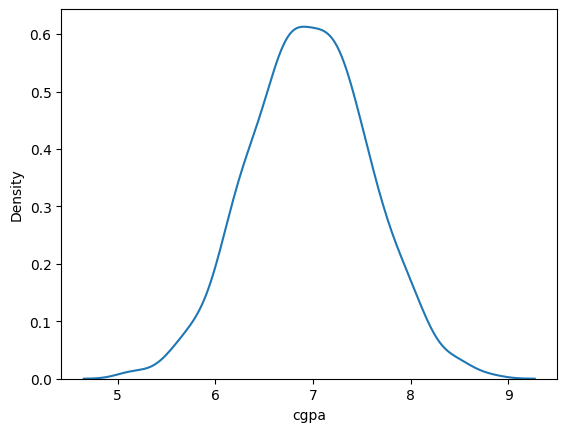

In [25]:
sns.kdeplot(df['cgpa'])